### Partición de los datos
Para evaluar el modelo, dividimos el dataset en dos partes: una parte para entrenar el modelo y otra parte para evaluar el modelo. La parte de entrenamiento se usa para ajustar el modelo a los datos, mientras que la parte de evaluación se usa para evaluar el desempeño del modelo en datos no vistos.

Se recomienda que la partición se dé entre el 70% y el 80% de los datos para entrenamiento y el resto para evaluación.

In [2]:
#### Importamos las librerias necesarias para el desarrollo del ejercicio
### Antes instalamos las librerias necesarias en consola

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression

In [3]:
# import some data to play with
iris = datasets.load_iris()
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [4]:
import pandas as pd

# Creamos un dataframe con los datos de iris
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
Y = iris.target

### Serie de pandas para la variable dependiente

Y_df = pd.Series(Y, name='species')

In [8]:
## Importamos train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_df, Y_df, test_size=0.3, random_state=42)

In [9]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5
...,...,...,...,...
71,6.1,2.8,4.0,1.3
106,4.9,2.5,4.5,1.7
14,5.8,4.0,1.2,0.2
92,5.8,2.6,4.0,1.2


In [10]:
y_train

81     1
133    2
137    2
75     1
109    2
      ..
71     1
106    2
14     0
92     1
102    2
Name: species, Length: 105, dtype: int32

### Se ajusta el modelo con X_train y Y_train

In [11]:
logreg_train=LogisticRegression()
logreg_train.fit(X_train,y_train)

LogisticRegression()

In [31]:
y_pred=logreg_train.predict(X_test)
y_pred=pd.DataFrame(y_pred,index=X_test.index)
y_pred

,0
73,1
18,0
118,2
78,1
76,1
31,0
64,1
141,2
68,1
82,1


In [40]:
## Histograma suavizado de las predicciones

pred_iris=pd.DataFrame(logreg_train.predict_proba(X_test),index=X_test.index)
pred_iris.columns = ['proba_pred_0', 'proba_pred_1', 'proba_pred_2']

DF_revisión_iris=pd.concat([pd.DataFrame(y_test),pred_iris],axis=1)


,species,proba_pred_0,proba_pred_1,proba_pred_2
73,1,4.102075e-03,0.812291,1.836067e-01
18,0,9.420333e-01,0.057966,5.801054e-07
118,2,1.586648e-08,0.002094,9.979058e-01
78,1,6.825243e-03,0.773234,2.199410e-01
76,1,1.595502e-03,0.751298,2.471063e-01
31,0,9.500924e-01,0.049907,4.586946e-07
64,1,7.780471e-02,0.904140,1.805569e-02
141,2,1.799013e-04,0.147492,8.523276e-01
68,1,2.423719e-03,0.780609,2.169671e-01
82,1,2.900892e-02,0.940807,3.018394e-02


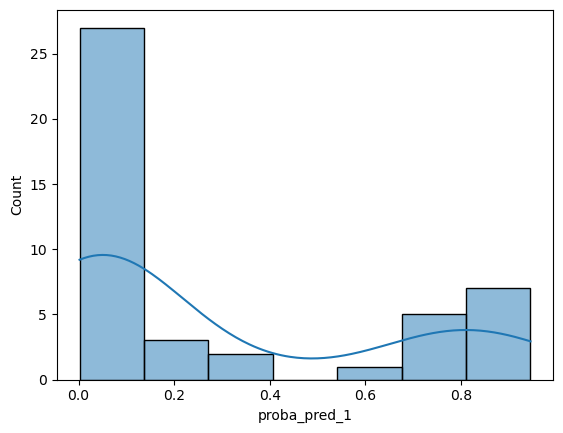

In [41]:
## Histograma suavizado de las predicciones

import seaborn as sns
sns.histplot(data=DF_revisión_iris, x="proba_pred_1", kde=True)
plt.show()


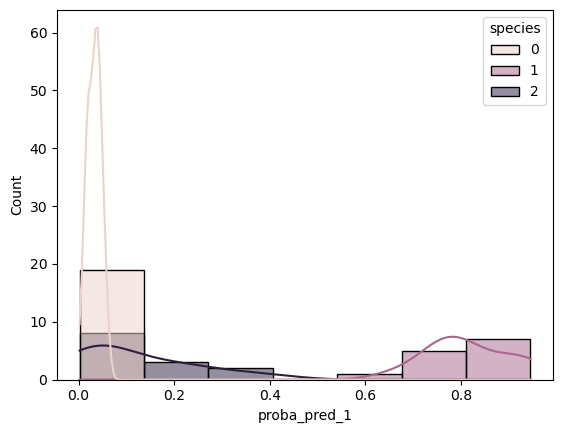

In [46]:
### Histigrama suavizado teniendo en cuenta el resultado real

sns.histplot(data=DF_revisión_iris, x="proba_pred_1", hue="species", kde=True)
plt.show()

In [69]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, logreg_train.predict(X_test))

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [101]:
import numpy as np
list=[y_test]
y_test = np.array(y_test)
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

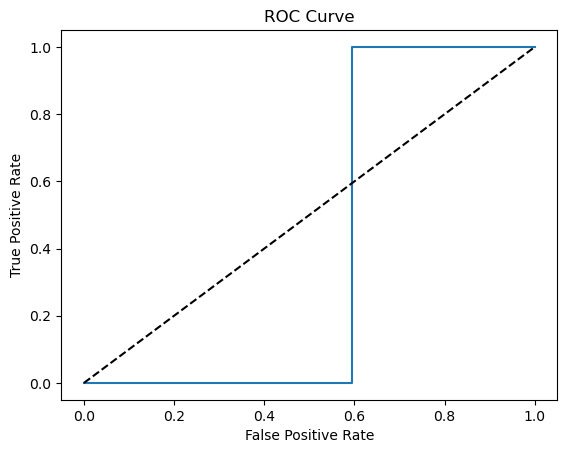

In [125]:
### Curva ROC

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, logreg_train.predict_proba(X_test)[:,0],pos_label=1)

### Graficamos la curva ROC

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Curve')

plt.show()

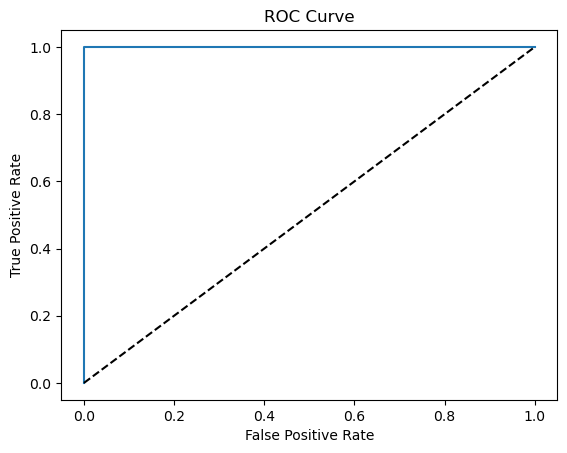

In [126]:
### Curva ROC

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, logreg_train.predict_proba(X_test)[:,1],pos_label=1)

### Graficamos la curva ROC

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Curve')

plt.show()

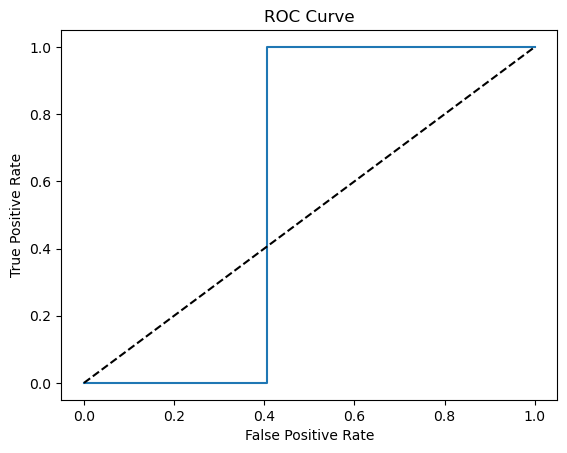

In [127]:
### Curva ROC

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, logreg_train.predict_proba(X_test)[:,2],pos_label=1)

### Graficamos la curva ROC

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Curve')

plt.show()